In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from google_geocoding import API_KEY
%matplotlib inline

In [2]:
# address = '390 QUEEN ST W'

# params = {
#     'key':API_KEY,
#     'address':address
# }

# base_url = "https://maps.googleapis.com/maps/api/geocode/json?"

# response = requests.get(base_url, params=params)
# response.json()

In [3]:
# response = response.json()
# if response['status'] =='OK':
#     geometry = response['results'][0]['geometry']['location']

In [4]:
# geometry

In [5]:
# df1 = pd.read_excel("C:\\Users\\stefy\\OneDrive - University of Waterloo\\Work Term Report 3 - Parking\\Datasets\\Toronto\\Parking Tickets 2019 - Delimited\\Delimited parking tickets df0 - df4.xlsx")
# df2 = pd.read_excel("C:\\Users\\stefy\\OneDrive - University of Waterloo\\Work Term Report 3 - Parking\\Datasets\\Toronto\\Parking Tickets 2019 - Delimited\\Delimited parking tickets df5 - df8.xlsx")
# df = pd.concat([df1,df2], axis=0, ignore_index=True)

In [69]:
 delimited_2019_dir="C:\\Users\\stefy\OneDrive - University of Waterloo\\Work Term Report 3 - Parking\\Datasets\\Toronto\\Parking Tickets 2019 - Delimited\\"
 df = pd.read_csv(delimited_2019_dir+'Parking_tickets_2019_joined_TTS_zone_.csv')

In [70]:
df.head(3)

,X,Y,ObjectID,LongLabel,Place_addr,AddNum,Side,StName,StType,StAddr,...,month,day,formatted_,day_of_wee,day_name,Address,Address_Nu,Street,TTS zone,gta06
0,-79.39236,43.65146,8,"50 Stephanie St, Toronto, Ontario, M5T 1B3, CAN","50 Stephanie St, Toronto, Ontario, M5T 1B3",50.0,L,Stephanie,St,50 Stephanie St,...,4,8,2019-04-08,0,Monday,"50 STEPHANIE ST, TORONTO, ON",50,STEPHANIE ST,NaN,67
1,-79.39757,43.65271,10,"279 Spadina Ave, Toronto, Ontario, M5T 2E3, CAN","279 Spadina Ave, Toronto, Ontario, M5T 2E3",279.0,R,Spadina,Ave,279 Spadina Ave,...,4,24,2019-04-24,2,Wednesday,"279 SPADINA AVE, TORONTO, ON",279,SPADINA AVE,NaN,67
2,-79.39082,43.65105,11,"15 Stephanie St, Toronto, Ontario, M5T 1B1, CAN","15 Stephanie St, Toronto, Ontario, M5T 1B1",15.0,R,Stephanie,St,15 Stephanie St,...,4,8,2019-04-08,0,Monday,"15 STEPHANIE ST, TORONTO, ON",15,STEPHANIE ST,NaN,67


In [71]:
df.shape

(125846, 38)

In [72]:
df = df[df['time_of_in'].isna()==False]

# df = df[df['gta06']==55]

In [73]:
df['year'] = df['date_of_in'].apply(lambda x: int(str(x)[0:4]))
df['month'] = df['date_of_in'].apply(lambda x: int(str(x)[4:6]))
df['day'] = df['date_of_in'].apply(lambda x: int(str(x)[6:8]))

In [74]:
unique_codes = df['infraction'].unique()
descriptions=[]
for code in unique_codes:
    descriptions.append(df[df['infraction']==code]['infracti_1'].iloc[0])

In [75]:
codes_descriptions = pd.DataFrame(unique_codes, columns=["codes"])
codes_descriptions['descriptions']=descriptions
codes_descriptions

,codes,descriptions
0,9,STOP-SIGNED HWY-PROHIBIT TM/DY
1,415,PARK COMMERC LOAD ZONE NOT LDG
2,406,PARK-VEH. W/O VALID ONT PLATE
3,367,STND ONSTRT ACCESSIBLE NO PRMT
4,207,PARK MACHINE-REQD FEE NOT PAID
...,...,...
98,386,PARK PRO VEH ON PEDESTRIAN WAY
99,60,STOP-WITHIN 15M OF SAFETY ZONE
100,59,STOP - BESIDE SAFETY ZONE
101,52,FAIL TO (PARK/STOP) ANGLE SPCE


In [76]:
df['dummy']=df['infraction'].apply(lambda x: 1)
aug_sept_codes= df.groupby('infraction',as_index=False).sum().sort_values(ascending=False, by='dummy')
aug_sept_codes.head(20)

,infraction,X,Y,ObjectID,AddNum,X.1,Y.1,date_of_in,set_fine_a,time_of_in,year,month,day,day_of_wee,Address_Nu,TTS zone,gta06,dummy
4,5,-1.968019e+06,1.082103e+06,2939695548,4037742.0,-1.968019e+06,1.082102e+06,500525387298,1239500,32274189,50051010,148952,392098,50089,4269880,0.0,1424472,24790
46,207,-1.830869e+06,1.006705e+06,2725378858,4142028.0,-1.830868e+06,1.006705e+06,465636034124,691860,34988638,46562178,138866,367524,46803,4530727,0.0,1363359,23062
2,3,-1.597013e+06,8.780205e+05,2421250637,2998125.0,-1.597012e+06,8.780215e+05,406174648560,603510,25540785,40616223,121057,312860,41856,3393267,0.0,1166327,20117
7,9,-9.762949e+05,5.368196e+05,1471615402,1569060.0,-9.762945e+05,5.368194e+05,248304188033,737880,15955898,24829662,73733,194733,24920,1583435,0.0,704115,12298
6,8,-7.108326e+05,3.908448e+05,1070307586,1141657.0,-7.108325e+05,3.908447e+05,180786752231,537240,11165032,18078126,53528,139431,18313,1165539,0.0,521102,8954
88,403,-6.305837e+05,3.467287e+05,941684976,2431873.0,-6.305839e+05,3.467288e+05,160374170934,1191450,11710614,16036917,48733,127634,16296,2617160,0.0,468909,7943
91,406,-3.966288e+05,2.180844e+05,609992315,827689.0,-3.966288e+05,2.180844e+05,100872252005,199840,7148258,10086924,29442,67805,9999,829955,0.0,297482,4996
16,29,-3.712464e+05,2.041240e+05,556938378,278616.0,-3.712465e+05,2.041239e+05,94411381450,140280,4817918,9440844,28682,73250,9541,285636,0.0,296180,4676
41,90,-2.027448e+05,1.114856e+05,316340849,173824.0,-2.027446e+05,1.114855e+05,51566674429,102160,3505889,5156526,13777,36729,5172,174484,0.0,132347,2554
96,415,-1.645622e+05,9.048892e+04,246654331,163825.0,-1.645620e+05,9.048891e+04,41855164271,82920,2918954,4185387,12613,32971,4165,170662,0.0,107261,2073


In [77]:
by_code = df.groupby('infraction', as_index=False).sum()
by_code = by_code.rename(columns={'dummy':'Count'})

In [78]:
top_codes = pd.merge(left=by_code, right=codes_descriptions, left_on='infraction', right_on='codes').sort_values(by='Count', ascending=False)
top_codes['code_category'] = top_codes['descriptions']
top_codes.loc[top_codes['Count']< 920,'code_category']="Other"
top_codes_summary = top_codes.groupby('code_category', as_index=False).sum().sort_values(ascending=False, by="code_category")
top_codes_summary

,code_category,infraction,X,Y,ObjectID,AddNum,X.1,Y.1,date_of_in,set_fine_a,time_of_in,year,month,day,day_of_wee,Address_Nu,TTS zone,gta06,Count,codes
15,STOP-SIGNED HWY-PROHIBIT TM/DY,9,-9.762949e+05,5.368196e+05,1471615402,1569060.0,-9.762945e+05,5.368194e+05,248304188033,737880,15955898,24829662,73733,194733,24920,1583435,0.0,704115,12298,9
14,STOP-SIGNED HIGHWAY-RUSH HOUR,403,-6.305837e+05,3.467287e+05,941684976,2431873.0,-6.305839e+05,3.467288e+05,160374170934,1191450,11710614,16036917,48733,127634,16296,2617160,0.0,468909,7943,403
13,STND ONSTRT ACCESSIBLE NO PRMT,367,-8.518559e+04,4.683723e+04,126721389,92296.0,-8.518543e+04,4.683724e+04,21664535577,482850,1495156,2166387,6491,16477,2226,92706,0.0,68083,1073,367
12,STAND VEH.-PROHIBIT TIME/DAY,8,-7.108326e+05,3.908448e+05,1070307586,1141657.0,-7.108325e+05,3.908447e+05,180786752231,537240,11165032,18078126,53528,139431,18313,1165539,0.0,521102,8954,8
11,STAND NON-TAXI IN SIGNED STAND,419,-9.407042e+04,5.172580e+04,143869287,172953.0,-9.407043e+04,5.172582e+04,23925875131,71100,1401041,2392515,7064,18731,2510,174183,0.0,65619,1185,419
10,PARK-WITHIN 9M INTERSECT ROAD,16,-7.708137e+04,4.238573e+04,120879870,78614.0,-7.708135e+04,4.238573e+04,19605087241,48550,1240973,1960449,5820,15241,1891,78614,0.0,47475,971,16
9,PARK-WITHIN 3M OF FIRE HYDRANT,15,-1.402029e+05,7.708794e+04,208864307,276349.0,-1.402030e+05,7.708787e+04,35656655934,176600,2447691,3565554,10875,28434,3635,320221,0.0,109175,1766,15
8,PARK-VEH. W/O VALID ONT PLATE,406,-3.966288e+05,2.180844e+05,609992315,827689.0,-3.966288e+05,2.180844e+05,100872252005,199840,7148258,10086924,29442,67805,9999,829955,0.0,297482,4996,406
7,PARK-SIGNED HWY-PUBLIC LANE,134,-1.081246e+05,5.945145e+04,158989384,255187.0,-1.081246e+05,5.945141e+04,27499600742,54480,1817931,2749878,7993,21442,2868,306709,0.0,76780,1362,134
6,PARK-SIGNED HWY-PROHIBIT DY/TM,5,-1.968019e+06,1.082103e+06,2939695548,4037742.0,-1.968019e+06,1.082102e+06,500525387298,1239500,32274189,50051010,148952,392098,50089,4269880,0.0,1424472,24790,5


In [79]:
top_codes_summary.loc[top_codes_summary['infraction']==9,'code_category']="Stopping on signed highway during prohibited time/day"
top_codes_summary.loc[top_codes_summary['infraction']==8,'code_category']="Standing vehicle during prihibited time/day"
top_codes_summary.loc[top_codes_summary['infraction']==5,'code_category']="Parking on signed highway during prohibited time/day"
top_codes_summary.loc[top_codes_summary['infraction']==3,'code_category']="Parking on private property with no consent"
top_codes_summary.loc[top_codes_summary['infraction']==207,'code_category']="Parking machine required fee not paid"
top_codes_summary.loc[top_codes_summary['infraction']==403,'code_category']="Stopping on signed highway during rush hour"
top_codes_summary = top_codes_summary.groupby('code_category').sum().sort_values(ascending=False, by="code_category")
top_codes_summary.iloc[:,-20:].head(10)

,infraction,X,Y,ObjectID,AddNum,X.1,Y.1,date_of_in,set_fine_a,time_of_in,year,month,day,day_of_wee,Address_Nu,TTS zone,gta06,Count,codes
code_category,,,,,,,,,,,,,,,,,,,
Stopping on signed highway during rush hour,403,-6.305837e+05,3.467287e+05,941684976,2431873.0,-6.305839e+05,3.467288e+05,160374170934,1191450,11710614,16036917,48733,127634,16296,2617160,0.0,468909,7943,403
Stopping on signed highway during prohibited time/day,9,-9.762949e+05,5.368196e+05,1471615402,1569060.0,-9.762945e+05,5.368194e+05,248304188033,737880,15955898,24829662,73733,194733,24920,1583435,0.0,704115,12298,9
Standing vehicle during prihibited time/day,8,-7.108326e+05,3.908448e+05,1070307586,1141657.0,-7.108325e+05,3.908447e+05,180786752231,537240,11165032,18078126,53528,139431,18313,1165539,0.0,521102,8954,8
STND ONSTRT ACCESSIBLE NO PRMT,367,-8.518559e+04,4.683723e+04,126721389,92296.0,-8.518543e+04,4.683724e+04,21664535577,482850,1495156,2166387,6491,16477,2226,92706,0.0,68083,1073,367
STAND NON-TAXI IN SIGNED STAND,419,-9.407042e+04,5.172580e+04,143869287,172953.0,-9.407043e+04,5.172582e+04,23925875131,71100,1401041,2392515,7064,18731,2510,174183,0.0,65619,1185,419
Parking on signed highway during prohibited time/day,5,-1.968019e+06,1.082103e+06,2939695548,4037742.0,-1.968019e+06,1.082102e+06,500525387298,1239500,32274189,50051010,148952,392098,50089,4269880,0.0,1424472,24790,5
Parking on private property with no consent,3,-1.597013e+06,8.780205e+05,2421250637,2998125.0,-1.597012e+06,8.780215e+05,406174648560,603510,25540785,40616223,121057,312860,41856,3393267,0.0,1166327,20117,3
Parking machine required fee not paid,207,-1.830869e+06,1.006705e+06,2725378858,4142028.0,-1.830868e+06,1.006705e+06,465636034124,691860,34988638,46562178,138866,367524,46803,4530727,0.0,1363359,23062,207
PARK-WITHIN 9M INTERSECT ROAD,16,-7.708137e+04,4.238573e+04,120879870,78614.0,-7.708135e+04,4.238573e+04,19605087241,48550,1240973,1960449,5820,15241,1891,78614,0.0,47475,971,16


Text(0, 0.5, '')

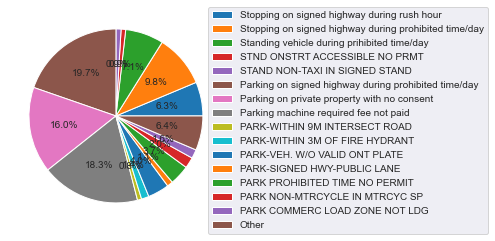

In [80]:
ax= top_codes_summary.plot.pie(y = 'Count',autopct="%.1f%%", figsize=(17,4), labeldistance=None)
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left")
ax.set_ylabel('')

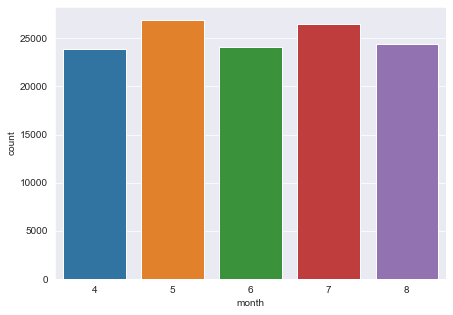

In [81]:
plt.figure(figsize=(7,5))
sns.countplot(x='month', data=df)
plt.show()

In [82]:
def get_hour(x):
    x= int(x)
    x = str(int(x))
    hour=0
    min=0
    if len(x)==1:
        min=x
    if len(x)==2:
        min=x
    if len(x)==3:
        hour=x[0]
        min = x[1:]
    if len(x)==4:
        hour=x[0:2]
        min=x[2:]
    if int(min)>60 or int(hour)>24:
     
        hour=-1
    return int(hour) 

get_hour(79)

-1

In [83]:
def get_minute(x):
    x= int(x)
    x = str(int(x))
    hour=0
    min=0
    if len(x)==1:
        min=x
    if len(x)==2:
        min=x
    if len(x)==3:
        hour=x[0]
        min = x[1:]
    if len(x)==4:
        hour=x[0:2]
        min=x[2:]
    if int(min)>60 or int(hour)>24:
   
        min=-1
    return int(min) 
get_minute(352)

52

In [84]:
df.columns

Index(['X', 'Y', 'ObjectID', 'LongLabel', 'Place_addr', 'AddNum', 'Side',
       'StName', 'StType', 'StAddr', 'Nbrhd', 'Postal', 'PostalExt', 'X.1',
       'Y.1', 'ARC_Addres', 'tag_number', 'date_of_in', 'infraction',
       'infracti_1', 'set_fine_a', 'time_of_in', 'location1', 'location2',
       'location3', 'City_1', 'Province', 'year', 'month', 'day', 'formatted_',
       'day_of_wee', 'day_name', 'Address', 'Address_Nu', 'Street', 'TTS zone',
       'gta06', 'dummy'],
      dtype='object')

In [85]:
df['minute']=df['time_of_in'].apply(get_minute)
df['hour']=df['time_of_in'].apply(get_hour)
df = df[df['hour']!=-1]
df['formatted_'] = pd.to_datetime(df[['year','month','day']])

In [86]:
# df['day_of_week'] = df['formatted_date'].dt.dayofweek
# df['day_name'] = df['formatted_date'].dt.day_name()

In [87]:
df['hour'].min(), df['hour'].max()
df['count']=1

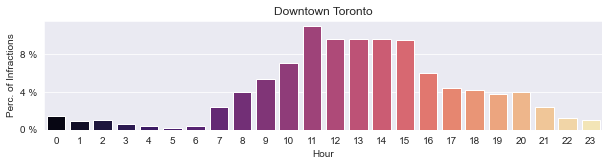

In [88]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 2)) 
sns.countplot(x='hour', data=df, palette='magma')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(round((x/125845)*100))+' %'))
ax.set_title('Downtown Toronto')
ax.set_xlabel('Hour')
ax.set_ylabel('Perc. of Infractions')
plt.show()

In [89]:
corr_matrix = df.corr()
corr_matrix

,X,Y,ObjectID,AddNum,X.1,Y.1,date_of_in,infraction,set_fine_a,time_of_in,...,month,day,day_of_wee,Address_Nu,TTS zone,gta06,dummy,minute,hour,count
X,1.000000,0.146966,0.020651,-0.388898,0.999663,0.149182,-0.033400,-0.046904,-0.033577,-0.032680,...,-0.033102,-0.007534,-0.025494,-0.088761,NaN,-0.922416,NaN,0.007303,-0.032960,NaN
Y,0.146966,1.000000,0.003993,-0.016064,0.146615,0.999549,0.014261,0.167221,0.043317,0.050060,...,0.014105,0.003668,-0.007722,-0.001628,NaN,-0.325314,NaN,-0.005279,0.050259,NaN
ObjectID,0.020651,0.003993,1.000000,-0.001333,0.020334,0.004497,0.011126,-0.001063,-0.003731,-0.016095,...,0.014971,-0.059489,-0.015338,-0.005144,NaN,-0.019553,NaN,0.007934,-0.016402,NaN
AddNum,-0.388898,-0.016064,-0.001333,1.000000,-0.389657,-0.017152,-0.014986,0.151159,0.070332,0.050642,...,-0.015605,0.008452,0.011845,0.999923,NaN,0.347642,NaN,-0.008950,0.050984,NaN
X.1,0.999663,0.146615,0.020334,-0.389657,1.000000,0.148807,-0.033120,-0.046689,-0.032877,-0.032891,...,-0.032818,-0.007565,-0.025624,-0.088963,NaN,-0.919693,NaN,0.007326,-0.033172,NaN
Y.1,0.149182,0.999549,0.004497,-0.017152,0.148807,1.000000,0.014577,0.167813,0.043420,0.050466,...,0.014412,0.003833,-0.007909,-0.001880,NaN,-0.326843,NaN,-0.005429,0.050671,NaN
date_of_in,-0.033400,0.014261,0.011126,-0.014986,-0.033120,0.014577,1.000000,0.002330,0.009385,0.001310,...,0.998002,0.116467,0.040286,-0.001646,NaN,0.031787,NaN,-0.001569,0.001371,NaN
infraction,-0.046904,0.167221,-0.001063,0.151159,-0.046689,0.167813,0.002330,1.000000,0.384173,0.156411,...,0.003101,-0.011924,-0.003901,0.037760,NaN,0.021343,NaN,-0.012597,0.156883,NaN
set_fine_a,-0.033577,0.043317,-0.003731,0.070332,-0.032877,0.043420,0.009385,0.384173,1.000000,0.024482,...,0.009322,0.001783,0.000106,0.017285,NaN,0.040932,NaN,-0.012371,0.024960,NaN
time_of_in,-0.032680,0.050060,-0.016095,0.050642,-0.032891,0.050466,0.001310,0.156411,0.024482,1.000000,...,0.001390,-0.001134,0.024342,0.013063,NaN,0.019054,NaN,0.016613,0.999245,NaN


In [90]:
df.head(3)

,X,Y,ObjectID,LongLabel,Place_addr,AddNum,Side,StName,StType,StAddr,...,day_name,Address,Address_Nu,Street,TTS zone,gta06,dummy,minute,hour,count
0,-79.39236,43.65146,8,"50 Stephanie St, Toronto, Ontario, M5T 1B3, CAN","50 Stephanie St, Toronto, Ontario, M5T 1B3",50.0,L,Stephanie,St,50 Stephanie St,...,Monday,"50 STEPHANIE ST, TORONTO, ON",50,STEPHANIE ST,NaN,67,1,32,20,1
1,-79.39757,43.65271,10,"279 Spadina Ave, Toronto, Ontario, M5T 2E3, CAN","279 Spadina Ave, Toronto, Ontario, M5T 2E3",279.0,R,Spadina,Ave,279 Spadina Ave,...,Wednesday,"279 SPADINA AVE, TORONTO, ON",279,SPADINA AVE,NaN,67,1,39,14,1
2,-79.39082,43.65105,11,"15 Stephanie St, Toronto, Ontario, M5T 1B1, CAN","15 Stephanie St, Toronto, Ontario, M5T 1B1",15.0,R,Stephanie,St,15 Stephanie St,...,Monday,"15 STEPHANIE ST, TORONTO, ON",15,STEPHANIE ST,NaN,67,1,35,20,1


In [186]:
weather_dir = 'C:\\Users\\stefy\\OneDrive - University of Waterloo\\Work Term Report 3 - Parking\\Datasets\\Toronto\\Weather\\'

weather = pd.read_excel(weather_dir+'weather_2019.xlsx')
weather['formatted_date'] = pd.to_datetime(weather['date'])
weather['Holiday'] = weather['Holiday']*0.5
weather.columns

Index(['date', 'maxtempC', 'mintempC', 'avgtempC', 'totalSnow_cm',
       'windspeedKmph', 'precipMM', 'FeelsLikeC', 'month', 'day', 'Holiday',
       'Holiday_name', 'formatted_date'],
      dtype='object')

In [187]:
# scaled_precip = weather[['formatted_date','precipMM']]
# scaled_precip['scaled']=scaled_precip['avgtempC']*40+citations['count'].sum()/len(citations['count'])*0.8

scaled_temp = weather[['formatted_date','avgtempC']]
scaled_temp['scaled']=weather['avgtempC']*35+citations['count'].sum()/len(citations['count'])*0.8


scaled_precip = weather[['formatted_date','precipMM']]
scaled_precip['scaled']=scaled_precip['precipMM']*34+citations['count'].sum()/len(citations['count'])*0.8

<ipython-input-187-70743ee804d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_temp['scaled']=weather['avgtempC']*35+citations['count'].sum()/len(citations['count'])*0.8
<ipython-input-187-70743ee804d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_precip['scaled']=scaled_precip['precipMM']*34+citations['count'].sum()/len(citations['count'])*0.8


In [188]:
temp_max, temp_min = weather['avgtempC'].max(),weather['avgtempC'].min()
temp_avg = weather['avgtempC'].sum()/len(weather['avgtempC'])
temp_max,temp_min,temp_avg

(28, -17, 9.734246575342466)

In [189]:
precip_max, precip_min = round(weather['precipMM'].max()),round(weather['precipMM'].min())
precip_avg = weather['precipMM'].sum()/len(weather['precipMM'])
precip_min, precip_max, precip_avg

(0, 32, 2.3095890410958906)

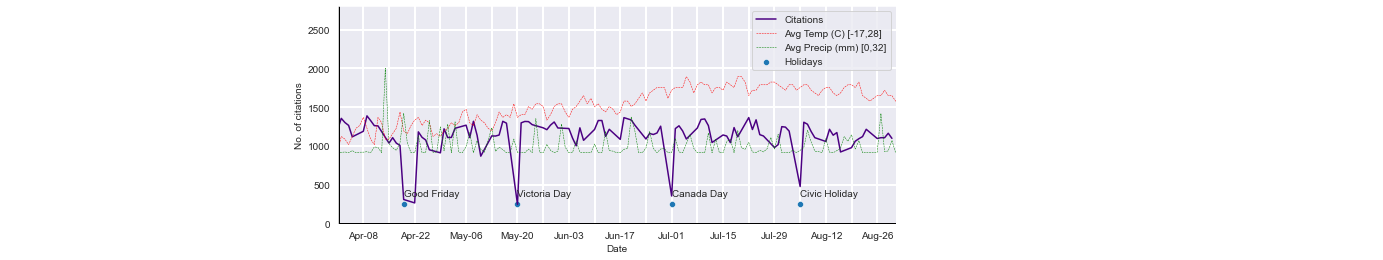

In [197]:
fig, ax = plt.subplots(figsize=(10, 4)) 
citations = df.groupby('formatted_').sum()
sns.lineplot(x='formatted_', y='count', data=citations,color='#4B0082', lw=1.5, label="Citations")
sns.scatterplot(x='formatted_date',y='Holiday', data=weather,ax=ax, label="Holidays")

sns.lineplot(x='formatted_date',y='scaled', data=scaled_temp, lw=0.5, ax=ax,color="red",ls='--', label='Avg Temp (C) ['+str(temp_min)+","+str(temp_max)+"]")

sns.lineplot(x='formatted_date',y='scaled', data=scaled_precip, lw=0.5, ax=ax,color="green",ls='--', label='Avg Precip (mm) ['+str(precip_min)+","+str(precip_max)+"]")
# plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
plt.grid(lw='2', b=True, which='both', axis='both' )
# tick on mondays every week
# loc = WeekdayLocator()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.legend(loc='upper right')

# ax.tick_params(which='both', width=2)
# ax.tick_params(which='major', length=20)
# ax.tick_params(which='minor', length=20, color='r')

ax.set_xlim(['2019-04-01','2019-08-31'])
ax.set_ylim([0,2800])
ax.set_xlabel('Date')
ax.set_ylabel('No. of citations')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(round(x))))

plt.axhline(linewidth=3, color='#000')
plt.axvline(linewidth=4, color='#000', x='2019-04-01')

for index, row in weather[weather['Holiday']==250][['formatted_date','Holiday','Holiday_name']].iterrows():
    ax.annotate(row['Holiday_name'], (row['formatted_date'], row['Holiday']+100))


In [198]:
aug_sept= df.groupby('formatted_date').sum().loc['2019-8-1':'2019-9-30']
aug_sept

KeyError: 'formatted_date'

In [ ]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(22, 6)) 

sns.lineplot(x='formatted_date',y='set_fine_amount', data=aug_sept)
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
#set ticks every week
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A,%b-%d'))
ax.set_xlim(['2019-08-01','2019-09-30'])

plt.show()


In [49]:
codes = df["infraction_code"].unique()
descriptions = list()
for code in list(codes):
    description = df[df['infraction_code']==code]['infraction_description'].iloc[0]
    descriptions.append(description)

codes_descriptions = pd.DataFrame()
codes_descriptions['codes']=codes
codes_descriptions['descriptions']=descriptions


In [50]:
for index, row in codes_descriptions.iterrows():
    print(str(row['codes'])+"  ----  "+row['descriptions'])

3  ----  PARK ON PRIVATE PROPERTY
29  ----  PARK PROHIBITED TIME NO PERMIT
5  ----  PARK-SIGNED HWY-PROHIBIT DY/TM
14  ----  PARK-OBSTRUCT (DRWAY/LANEWAY)
9  ----  STOP-SIGNED HWY-PROHIBIT TM/DY
337  ----  PARK - ON BOULEVARD
404  ----  STOP-9 M PEDESTRIAN X BEYOND
406  ----  PARK-VEH. W/O VALID ONT PLATE
15  ----  PARK-WITHIN 3M OF FIRE HYDRANT
384  ----  STOP VEH OTR THN BCYCL-BYCL LN
192  ----  STAND SIGNED TRANSIT STOP
8  ----  STAND VEH.-PROHIBIT TIME/DAY
415  ----  PARK COMMERC LOAD ZONE NOT LDG
414  ----  PARK VEH.-COMMERCIAL LOAD ZONE
30  ----  STOP-(ON/OVER) (SIDEWK/FTPATH)
134  ----  PARK-SIGNED HWY-PUBLIC LANE
355  ----  PARK IN ACCESSIBLE NO PERMIT
28  ----  PARK-N.YORK 2AM-6AM DEC1-MAR31
320  ----  PARK NON-BUS-BUS PK ZNE DY/TM
347  ----  PARK IN A FIRE ROUTE
37  ----  PARK HEAVY (TRUCK/VEH.) TM/DY
2  ----  PARK - LONGER THAN 3 HOURS
16  ----  PARK-WITHIN 9M INTERSECT ROAD
77  ----  PARK-(FRNT/60 CM) DRWAY/LANEWY
336  ----  PARK-FAIL TO DISPLAY PERMIT
419  ----  STAND NON-

In [51]:
df['dummy']=df['infraction_code'].apply(lambda x: 1)
aug_sept_codes= df.groupby('infraction_code').sum().sort_values(ascending=False, by='set_fine_amount')
aug_sept_codes.head(20)

,date_of_infraction,set_fine_amount,time_of_infraction,year,month,day,minute,hour,dummy,day_of_week
infraction_code,,,,,,,,,,
5,6754876112589,16727650,434994483.0,675464526,2256740,5178589,9739483,4252550,334554,903837
3,9182984027345,13643610,448857790.0,918267447,3024430,7114345,13298990,4355588,454813,1284217
403,1368040272090,10163310,99169287.0,136799364,455532,1078890,1767087,974022,67756,139420
207,5786185385635,8597310,437017831.0,578598963,1912637,4491935,8369831,4286480,286577,833060
29,5665611619786,8418150,202032740.0,566541495,1921943,4475486,8358740,1936740,280605,846545
9,2135951488142,7800340,142682537.0,213587991,699117,1666442,3116637,1395659,105789,272860
8,1390955680187,5047900,87556410.0,139090929,453096,1080587,1988610,855678,68891,186957
406,2091205759800,4142930,125621033.0,209113887,655516,1338200,3055433,1225656,103573,295776
347,274774836339,3402250,19481777.0,27476571,89124,213939,397777,190840,13609,42476


In [52]:
code_5 = df[df['infraction_code']==5]
code_5.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,minute,hour,formatted_date,dummy,day_of_week,day_name
3,***03706,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,2,0,2019-01-01,1,1,Tuesday
7,***03707,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,3.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,3,0,2019-01-01,1,1,Tuesday
12,***03708,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,4.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,4,0,2019-01-01,1,1,Tuesday
15,***03709,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,5.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,5,0,2019-01-01,1,1,Tuesday
36,***39949,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,11.0,OPP,7 PARK VISTA,NaN,NaN,ON,2019,1,1,11,0,2019-01-01,1,1,Tuesday


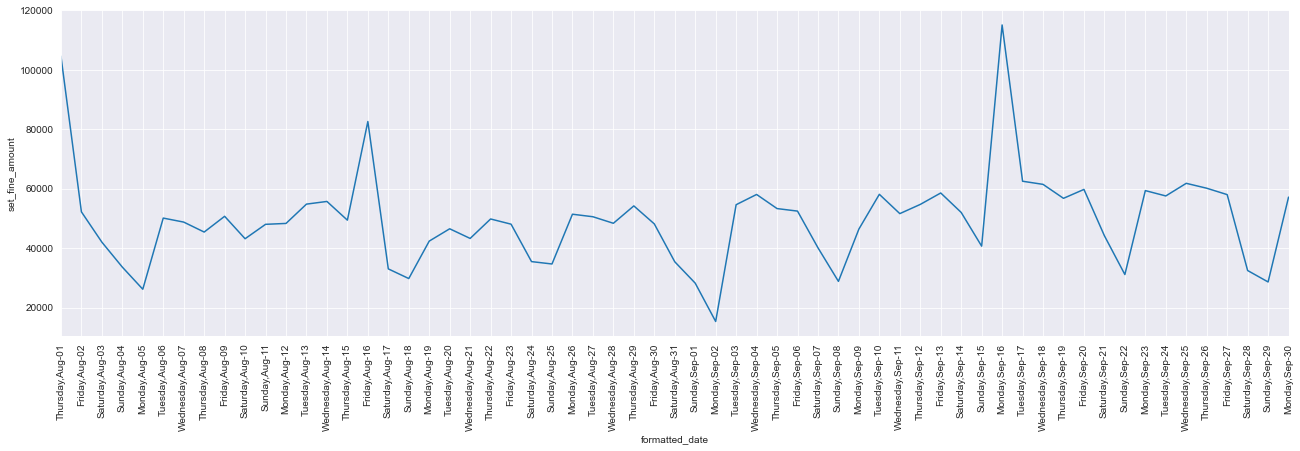

In [53]:
code_5_bydate = code_5.groupby('formatted_date').sum().loc['2019-8-1':'2019-9-30']

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(22, 6)) 

sns.lineplot(x='formatted_date',y='set_fine_amount', data=code_5_bydate)
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
#set ticks every week
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A,%b-%d'))
ax.set_xlim(['2019-08-01','2019-09-30'])

plt.show()


In [54]:
top_3 = df[(df['infraction_code']==5) | (df['infraction_code']==3) | (df['infraction_code']==403)]
top_3_delimited = top_3.sort_values(ascending=True, by="formatted_date").set_index("formatted_date").loc['2019-8-28':'2019-9-22']
top_3_delimited


,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,minute,hour,dummy,day_of_week,day_name
formatted_date,,,,,,,,,,,,,,,,,,,
2019-08-28,***12940,20190828,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,1506.0,OPP,154 PEARL ST,NaN,NaN,ON,2019,8,28,6,15,1,2,Wednesday
2019-08-28,***98603,20190828,3,PARK ON PRIVATE PROPERTY,30,1506.0,NaN,4700 KEELE ST,NaN,NaN,ON,2019,8,28,6,15,1,2,Wednesday
2019-08-28,***17315,20190828,403,STOP-SIGNED HIGHWAY-RUSH HOUR,150,1506.0,NR,437 QUEEN ST W,NaN,NaN,ON,2019,8,28,6,15,1,2,Wednesday
2019-08-28,***16999,20190828,403,STOP-SIGNED HIGHWAY-RUSH HOUR,150,1506.0,NR,842 KING ST W,NaN,NaN,ON,2019,8,28,6,15,1,2,Wednesday
2019-08-28,***92160,20190828,403,STOP-SIGNED HIGHWAY-RUSH HOUR,150,1507.0,NR,33 COLLEGE ST,NaN,NaN,ON,2019,8,28,7,15,1,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-22,***35030,20190922,3,PARK ON PRIVATE PROPERTY,30,813.0,NaN,15 TOBERMORY DR,NaN,NaN,ON,2019,9,22,13,8,1,6,Sunday
2019-09-22,***02393,20190922,3,PARK ON PRIVATE PROPERTY,30,815.0,NaN,101 HUMBER BLVD,NaN,NaN,ON,2019,9,22,15,8,1,6,Sunday
2019-09-22,***02394,20190922,3,PARK ON PRIVATE PROPERTY,30,815.0,NaN,101 HUMBER BLVD,NaN,NaN,ON,2019,9,22,15,8,1,6,Sunday


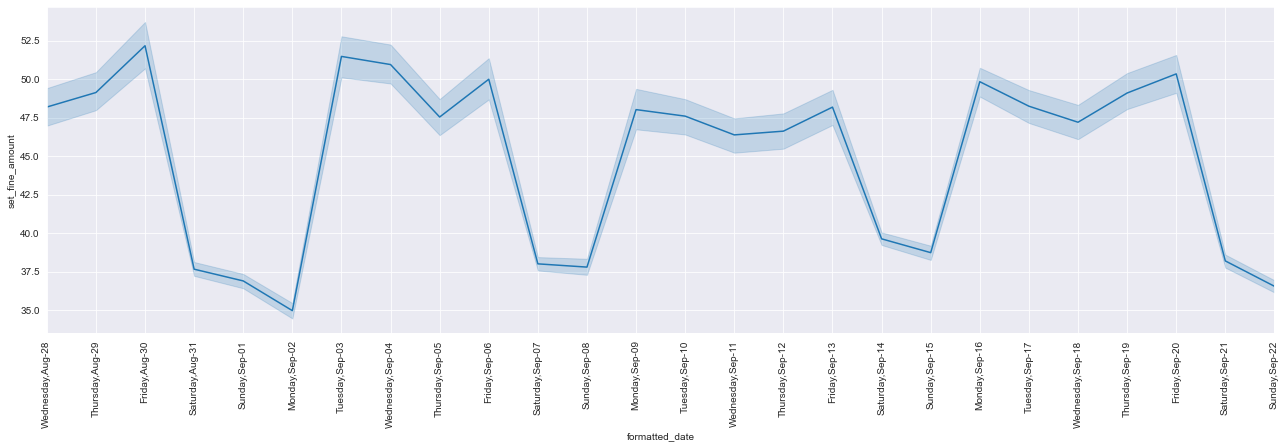

In [55]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(22, 6)) 

sns.lineplot(x='formatted_date',y='set_fine_amount', data=top_3_delimited)
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
#set ticks every week
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A,%b-%d'))
ax.set_xlim(['2019-08-28','2019-09-22'])

plt.show()

Most infractions on Mondays and Tuesdays are of code 5: PARK-SIGNED HWY-PROHIBIT DY/TM and 3: PARK ON PRIVATE PROPERTY

In [1]:
df[df['formatted_date']=='2019-09-16']['infraction_code'].value_counts().head()

NameError: name 'df' is not defined

The least number of infractios is often on sSundays. Most of these infractions have code 3: PARK ON PRIVATE PROPERTY and 207: PARK MACHINE-REQD FEE NOT PAID  

In [57]:
df[df['formatted_date']=='2019-09-15']['infraction_code'].value_counts().head(20)

3      1050
207     864
5       813
29      791
2       412
406     204
9       153
8       145
6       115
15       76
192      47
90       43
347      39
415      23
336      20
30       19
16       18
134      17
48       16
419      15
Name: infraction_code, dtype: int64

In [58]:
by_dayofweek = df.groupby('day_of_week').sum().sort_values(by="day_of_week", ascending=True)
by_dayofweek


,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction,year,month,day,minute,hour,dummy
day_of_week,,,,,,,,,,
0,6319826825468,29273981,15693240,364548754.0,631961133,2106121,4883368,9114354,3554344,313007
1,7288535494318,33186469,17913870,419806870.0,728828715,2427751,5569218,10584670,4092222,360985
2,6997602242608,31417420,17090840,403116077.0,699736944,2274744,5328208,10173877,3929422,346576
3,6932062087051,31814038,17122110,409118278.0,693183270,2239854,5401651,10066978,3990513,343330
4,7098962351326,32717780,17738215,411798976.0,709872324,2336798,5431526,10314876,4014841,351596
5,5541736262158,24488754,12416560,305268992.0,554154930,1826391,4323058,7998692,2972703,274470
6,4482678994808,18234972,10369330,243530791.0,448252323,1523121,3452708,6433191,2370976,222017


# Number of infractions per day of week all year

<AxesSubplot:ylabel='dummy'>

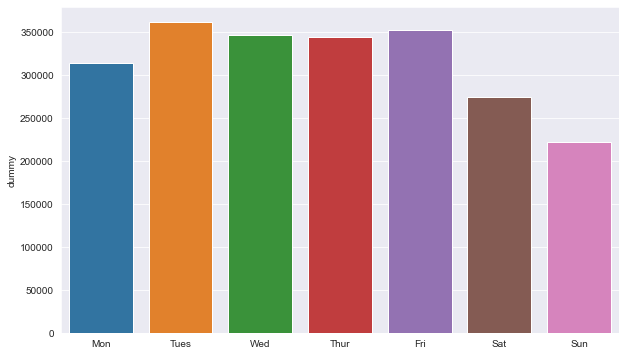

In [59]:
plt.figure(figsize=(10,6))
daysofweek = ['Mon','Tues','Wed','Thur','Fri','Sat','Sun']
sns.barplot(x=daysofweek, y="dummy", data=by_dayofweek)

# Fine amount charged per day of week all year

<AxesSubplot:ylabel='set_fine_amount'>

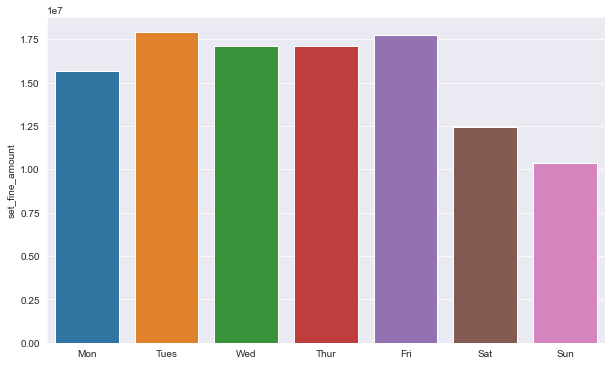

In [60]:
plt.figure(figsize=(10,6))
daysofweek = ['Mon','Tues','Wed','Thur','Fri','Sat','Sun']
sns.barplot(x=daysofweek, y="set_fine_amount", data=by_dayofweek)

In [61]:

df.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,minute,hour,formatted_date,dummy,day_of_week,day_name
0,***29025,20190101,3,PARK ON PRIVATE PROPERTY,30,0.0,AT,2110 KEELE ST,NaN,NaN,ON,2019,1,1,0,0,2019-01-01,1,1,Tuesday
1,***32896,20190101,3,PARK ON PRIVATE PROPERTY,30,1.0,AT,125 QUEENS WHARF RD,NaN,NaN,ON,2019,1,1,1,0,2019-01-01,1,1,Tuesday
2,***41781,20190101,29,PARK PROHIBITED TIME NO PERMIT,30,1.0,S/O,HAZELWOOD AVE,W/O,JONES AVE,ON,2019,1,1,1,0,2019-01-01,1,1,Tuesday
3,***03706,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,2,0,2019-01-01,1,1,Tuesday
4,***69805,20190101,14,PARK-OBSTRUCT (DRWAY/LANEWAY),50,3.0,R/O,1801 EGLINTON AVE W,NaN,NaN,ON,2019,1,1,3,0,2019-01-01,1,1,Tuesday


In [62]:
df.groupby('hour').sum()

,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction,year,month,day,minute,dummy,day_of_week
hour,,,,,,,,,,
0,1652628173738,4610890,3254645,2427435.0,165257169,551891,1294638,2427435,81851,273594
1,1497483100454,3799477,2847130,9531289.0,149743173,502088,1161654,2114589,74167,237063
2,1973195394659,3244286,3607560,22486101.0,197312832,655526,1522059,2940501,97728,301452
3,2250979164964,2600475,3391380,36739201.0,225090234,750649,1760064,3293401,111486,335714
4,1738437856107,2047679,2472870,36661739.0,173837919,573185,1347607,2221339,86101,266330
5,414877601505,407962,604710,10688175.0,41486412,131600,321505,414175,20548,66196
6,513651208604,1533434,956400,16352267.0,51363360,172109,397704,1088267,25440,71004
7,1257011678877,7350028,3763145,45452140.0,125696883,418876,961277,1872240,62257,163696
8,2013597004790,10399386,4564570,82753982.0,201352851,669366,1558190,2970782,99729,270992


In [64]:
addresses = df['location2']
addresses

0                2110 KEELE ST
1          125 QUEENS WHARF RD
2                HAZELWOOD AVE
3               10 CARABOB CRT
4          1801 EGLINTON AVE W
                  ...         
2213933           4700 JANE ST
2213934    61 BISHOP TUTU BLVD
2213935         735 COLLEGE ST
2213936    61 BISHOP TUTU BLVD
2213937     320 ASSINIBOINE RD
Name: location2, Length: 2211981, dtype: object

In [65]:
get_street_name(address):
    address = str(address)
    valid_char=""
    address.find()
    for char in address:
        if char.isdigit():
            x=1
            valid_char += char




SyntaxError: invalid syntax (<ipython-input-65-b885cd824e54>, line 1)